In [33]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

The function ss creates a state space model of the system. A continuous time-invariant system will be used for this example (put in equations for xdot and ydot here)

In [2]:
A = np.matrix([[1, 0], [0, 0]])
B = np.ones((2, 2))
C = np.matrix([[0, 0], [0, 1]])
D = np.eye(2,2)

This module has built in functions to easily determine the controllability and observability matrices of a system using the functions ct.ctrb and ct.obs.

In [3]:
sys = ct.ss(A, B, C, D)
sys

<LinearIOSystem:sys[2]:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

In [4]:
controllability = ct.ctrb(A, B)
controllability

array([[1., 1., 1., 1.],
       [1., 1., 0., 0.]])

In [5]:
observability = ct.obsv(A, C)
observability

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

The controllability or observability Gramian can be found using the ct.gram function specifiying the system and type (controllability or observability) of Gramian desired.

In [6]:
controllabilityGramian = ct.gram(sys, 'c')
controllabilityGramian

ValueError: Oops, the system is unstable!

In [8]:
system = ct.ss(A, B, C, D)
system

<LinearIOSystem:sys[4]:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

Creating a transfer function can be accomplished by first defining the constant s using the following command

In [9]:
s = ct.TransferFunction.s
s

TransferFunction(array([1, 0]), array([1]))

This can then be utilized to define a transfer function G(s)

In [10]:
G  = (s + 1)/(s**2 + 2*s + 1)
G

TransferFunction(array([1, 1]), array([1, 2, 1]))

For single input single output (SISO) systems, the transfer function of a simple system can be defined using the TransferFunction command and specifying the coefficients of the numerator and denominator.

In [11]:
sys = ct.TransferFunction([2,2], [1, 2, 3])
sys

TransferFunction(array([2, 2]), array([1, 2, 3]))

The ct.poles and ct.zeros functions are used to determine the poles and zeros of the system. They can be used on both state space representations and transfer functions and return an array of the poles/zeros of the system.

In [12]:
stateSpacePoles = ct.poles(system)
print(f'The poles of the state space system are {stateSpacePoles}')

transferFunctionPoles = ct.poles(G)
print(f'\nThe poles of the transfer function G are {transferFunctionPoles}')

The poles of the state space system are [1.+0.j 0.+0.j]

The poles of the transfer function G are [-1.+6.68896751e-09j -1.-6.68896751e-09j]


In [13]:
stateSpaceZeros = ct.zeros(system)
print(f'The zeros of the state space system are {stateSpaceZeros}')

transferFunctionZeros = ct.zeros(G)
print(f'\nThe zeros of the transfer function G are {transferFunctionZeros}')

The zeros of the state space system are [ 1.+0.j -1.+0.j]

The zeros of the transfer function G are [-1.+0.j]


The DC gain of the system can also be found using the ct.dcgaini command. Here we will multiply our transfer function G by a gain of 5 to highlight this.

In [14]:
k = 5 # DC gain 
G = k * (s + 1)/(s**2 + 2*s + 1)
gain = ct.dcgain(G)
print(f'The DC gain of the system is {gain}')

The DC gain of the system is 5.0


## Block Diagrams

### Series Interconnection 

The series command returns the series connection of two systems sys3=sys1 * sys2.

In [47]:
H = (s + 2)/(s + 1)
series = ct.series(G, H)
series

TransferFunction(array([ 5, 15, 10]), array([1, 3, 3, 1]))

### Paralllel Interconnection

The parallel command returns the parallel connection of two systems equivalent to sys3=sys1+sys2.

In [49]:
parallel = ct.parallel(G, H)
parallel

TransferFunction(array([ 1,  9, 15,  7]), array([1, 3, 3, 1]))

### Feedback Interconnection

The feedback command gives the feedback interconnection between two I/O systems. The primary plant is sys1. The feedback plant is sys2 (often a feedback controller).

In [50]:
feedback = ct.feedback(G, H, sign=-1) #the default is sign=-1 which is negative feedback
feedback

TransferFunction(array([ 5, 10,  5]), array([ 1,  8, 18, 11]))

## Frequency Domain Plotting

### Bode Plot

The bode plot of the system can be plotted over a (optional) frequency range using the ct.bode command. It returns the magnitude ratio, phase lag, and frequency as well as the bode plot for a given transfer function.

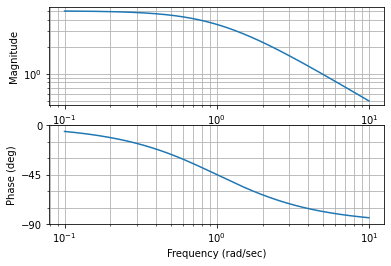

In [17]:
mag, phase, omega = ct.bode(G)

The bode plot can be customized with several options including setting the x axis to units of Hz or changing the phase from degrees to radians.

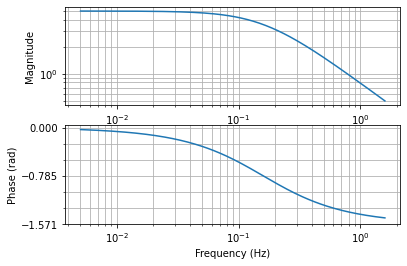

In [18]:
mag, phase, omega = ct.bode(G, w, Hz=True, deg=False)

The freqresp command outputs the same information but does not plot it.

In [19]:
w=linspace(0.1, 10, 30)
mag, phase, omega = ct.freqresp(G, w)

In [20]:
mag

array([4.99750187, 4.9973532 , 4.99719569, 4.99702882, 4.99685202,
       4.99666471, 4.99646627, 4.99625604, 4.99603331, 4.99579735,
       4.99554738, 4.99528255, 4.995002  , 4.99470479, 4.99438994,
       4.9940564 , 4.99370307, 4.99332877, 4.99293227, 4.99251226,
       4.99206735, 4.99159607, 4.99109687, 4.9905681 , 4.99000802,
       4.98941478, 4.98878644, 4.98812094, 4.98741609, 4.98666958,
       4.98587898, 4.9850417 , 4.98415501, 4.98321603, 4.9822217 ,
       4.9811688 , 4.98005391, 4.97887343, 4.97762357, 4.97630028,
       4.97489934, 4.97341624, 4.97184625, 4.97018438, 4.96842534,
       4.96656358, 4.9645932 , 4.96250803, 4.96030153, 4.95796681,
       4.95549664, 4.95288336, 4.95011894, 4.94719492, 4.94410239,
       4.94083199, 4.93737387, 4.9337177 , 4.92985261, 4.92576722,
       4.92144956, 4.9168871 , 4.91206673, 4.90697468, 4.9015966 ,
       4.89591745, 4.88992153, 4.88359247, 4.87691319, 4.86986591,
       4.86243212, 4.8545926 , 4.8463274 , 4.83761581, 4.82843

### Gain and Phase Margin and Crossover Frequencies

You can calculate the gain and phase margin and the associated crossover frequencies using the margin command.

In [21]:
gm, pm, Wcg, Wcp = ct.margin(G)
print(f"The gain margin is {gm} degrees with phase crossover frequency {Wcp} rad/s.")
print(f"The phase margin is {pm} with gain crossover frequency {Wcg}.")

The gain margin is inf degrees with phase crossover frequency 4.8989794855663575.
The phase margin is 101.5369590328155 with gain crossover frequency nan.


### Nyquist Plot

The Nyquist plot for the system can also be plotted over an (optional) frequency range.

0

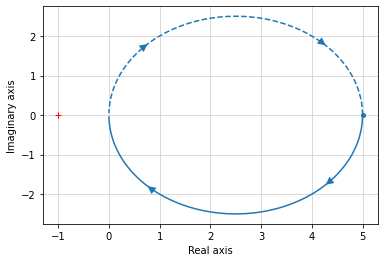

In [67]:
ct.nyquist_plot(G)

## Time Domain Simulation

### Forced Response

The ct.forced_response command simulates the output of a linear system. 

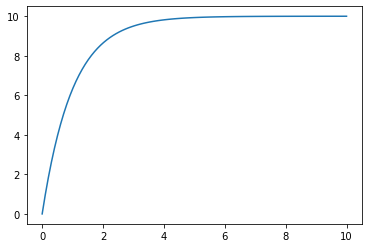

In [68]:
T=np.linspace(0, 10, 100)
u=2
X0=0 #if left blank, defaults to 0
forced_T, forced_yout = ct.forced_response(G, T, u, X0)
plt.plot(forced_T, forced_yout)

### Impulse Response

The ct.initial_response command gives the response of a linear system given initial conditions. If the system has multiple outputs, one may be selected, or if no selection is made, all outputs are given. Similar to forced response but with zero input.

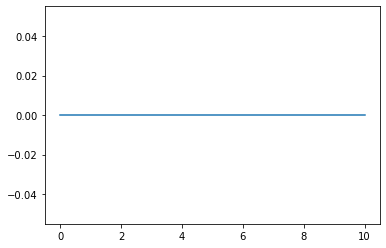

In [69]:
impulse_T, impulse_yout = ct.initial_response(G, T, X0) #yout is the response output
plt.plot(impulse_T, impulse_yout)

### Step Response

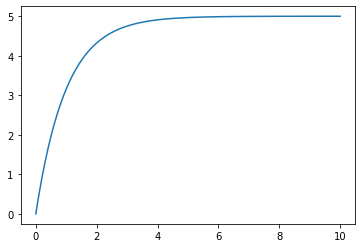

In [66]:
step_T, step_yout = ct.step_response(G, T, X0)
plt.plot(step_T, step_yout)